In [25]:
import numpy as np
from skimage import io, color, filters
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
import cv2

In [26]:
def carregar_imagem_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = io.imread(BytesIO(response.content))
        if len(img.shape) == 3:
            img = color.rgb2gray(img)
        return img
    except Exception as e:
        print(f"Erro ao carregar imagem do GitHub: {e}")
        return None

In [27]:
minha_url = "https://img.freepik.com/vetores-gratis/ilustracao-vetorial-colorida-de-carros-compactos_1308-163678.jpg?semt=ais_hybrid&w=740&q=80"
imagem_carregada = carregar_imagem_github(minha_url)

In [28]:
def Borda_canny(img, th1=100, th2=200, blur=True, tamanho_kernel=(5,5)):

  # Verifica se a imagem foi carregada corretamente
  if img is None:
        raise ValueError("Imagem inválida ou não carregada.")

  # Garante que a imagem esteja em tons de cinza
  if len(img.shape) == 3:
        img_gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
  else:
        img_gray = (img * 255).astype(np.uint8)

  # Reduz ruídos usando o Filtro Gaussiano
  if blur:
        img_gray = cv2.GaussianBlur(img_gray, tamanho_kernel, 0)

  # Aplica o detector de bordas de Canny
  edges = cv2.Canny(img_gray, th1, th2)

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  plt.title('Imagem Original')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(edges, cmap='gray')
  plt.title(f'Canny (th1={th1}, th2={th2})')
  plt.axis('off')

  plt.show()

  return edges

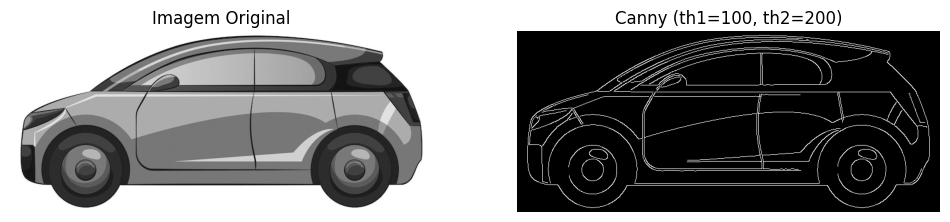

In [29]:
bordas_padrao = Borda_canny(imagem_carregada)